# Credit Card Fraud Detection

## Description

Wtih the massive acceleration of e-commerce, online payment fraud has surged, costing businesses over $20 billion annually worldwide. For every dollar lost to fraud, businesses incur additional operational costs, network fees, and customer churn. To combat this evolving and sophisticated threat, businesses need effective fraud detection solutions that leverage the power of data and machine learning (ML).

This project aims to develop an Ml-powered fraud detection model capable of identifying fraudulent transactions. Traiditonal approaches to fraud detection often rely on brute-force rules, which can be rigid and prone to blocking legitimate transactions (false positives). In contrast, ML-based models can identify nuanced patterns that help businesses maximize revenue by striking a balance between false positives (blocking good customers and false negatives (allowing fraud to pass).

### Dataset Overview
The dataset sourced from Kaggle presents a simulated credit card transaction dataset containing genuine and fraudulent transactions from Jan 1, 2019 - Dec 31, 20202. The dataset presents a realistic challenge due to its imbalanced nature, the majority of transactions being legitimate. The presence of numerous categorical features and a large number of variables requires careful feature selection to identify the most important predictors of fraud. Key considerations for this model include:
* Imbalanced dataset: As the majority of transactions are not fraudulent, techniques such as oversampling, undersampling, or SMOTE will be explored to balance the dataset.
* Feature selection: Given the high number of features, identifying the most important variables will be crucial to model performance and efficiency.
* Handling categorical variables: Appropriate encoding strategies (e.g. one-hot encoding or target encoding) will be applied to convert categorical  variables for the ML model.

### How to Choose a Performance Metric
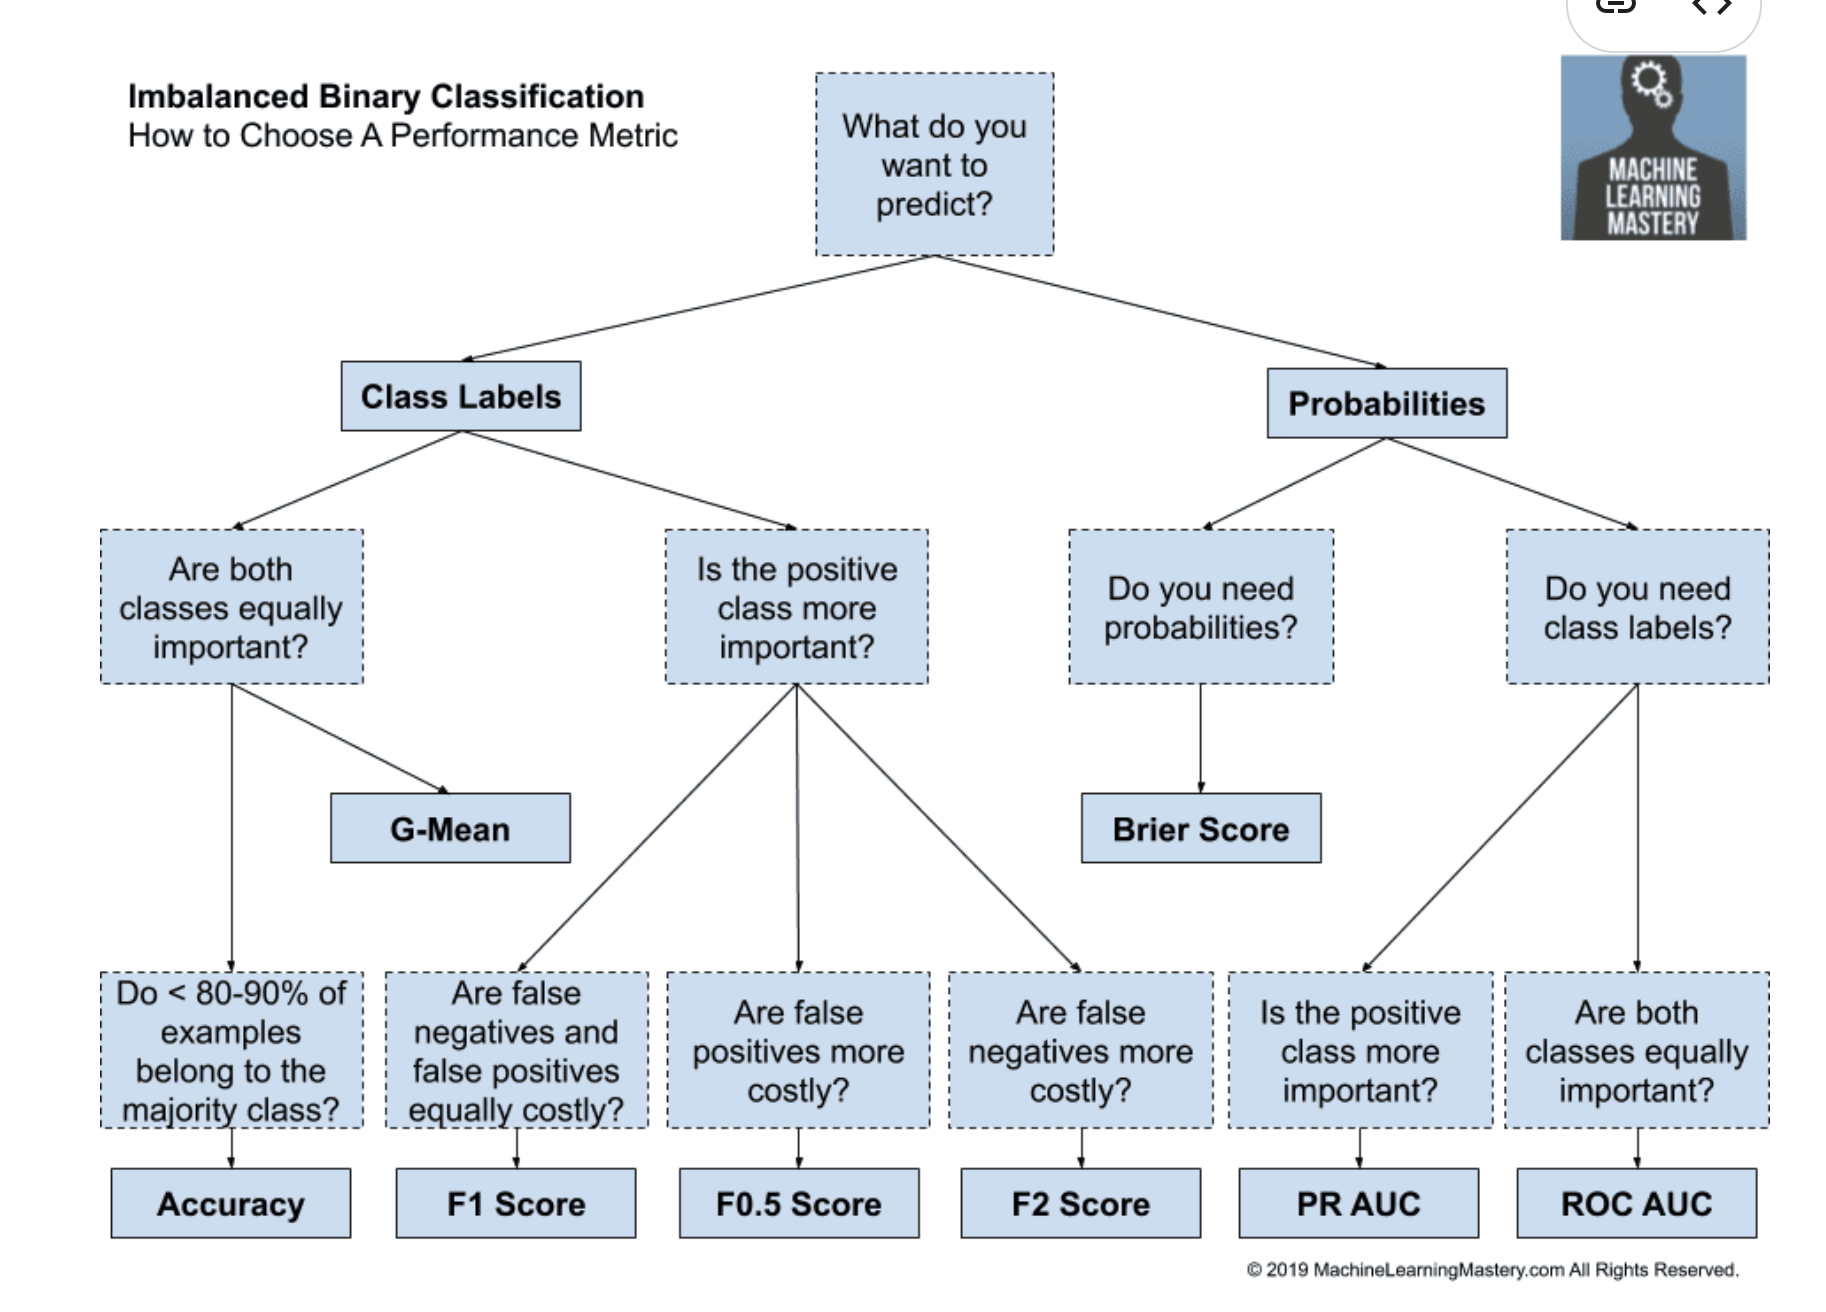

### Key Components of the Project
1. Data Preprocessing: Cleaning the dataset, balancing the classes, handling missing values, and encoding categorical features.
2. Feature Engineering: Identifying the most predictive features, reducing dimensionality, and optimizing model performance.
3. Model Development: Implementing a fraud detection model using techniques like logistic regression, decision trees, random forests, or gradient boosting, with a focus on improving precision and recall.
4. Model Evaluation: Evaluating model performance using metrics such as F1 score, precision, recall, and the ROC-AUC curve to understand the trade-offs between false positives and false negatives.

The goal is to build a robust, adaptive fraud detection model that helps businesses prevent fraud efficiently while minimizing disruption to legitimate customer transactions.

### Sources: 
* [Kaggle: Credit Card Transactions Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection/data)
* [Kaggle: Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
* [Kaggle: Credit card Fraud Balance is Key](https://www.kaggle.com/code/ohseokkim/creditcard-fraud-balance-is-key-feat-pycaret)
* [Stripe: Risk Evaluation - Access the Stripe Radar risk evaluations in the Dashboard and the API](https://docs.stripe.com/radar/risk-evaluation)
* [Stripe: How Stripe uses ML for Fraud Detection](https://stripe.com/guides/primer-on-machine-learning-for-fraud-protection)
* [AWS: Banking Fraud Detection with Machine Learning and Real-time analytics on AWS](https://aws.amazon.com/blogs/industries/banking-fraud-detection-with-machine-learning-and-real-time-analytics-on-aws/)
* [Fine-tuned LLM on Fraud Detection](https://huggingface.co/Bilic/Mistral-7B-LLM-Fraud-Detection)
* [Evaluation Metrics for Imbalanced Classification](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)

### Credits:
Marcin Rutecki

In [5]:
pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Or install these packages individually
# !pip install folium
!pip install imblearn
# !pip install -U matplotlib
# !pip install numpy
# !pip install openai
# !pip install pandas
# !pip install plotly
!pip install --upgrade scikit-learn
# !pip install scipy
# !pip install seaborn
# !pip install streamlit
# !pip install watchdog
# !pip install xgboost

# Getting Started

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from pprint import pprint
from sklearn import metrics
from collections import Counter

# Import data

[Kaggle Data Source for Fraud Detection](https://www.kaggle.com/datasets/kartik2112/fraud-detection/data)

In [5]:
url = 'https://media.githubusercontent.com/media/itancio/churn/refs/heads/main/notebook/fraud/fraudTrain.csv'
raw_df = pd.read_csv(url, index_col=0)

raw_df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...      lat      long  city_pop  \
0                  Moravian Falls  ...  36.0788  -81.1781      3495   
1                          Orient  ...  48.8878 -118.2105       149   
2                      Malad City  ...  42.1808 -112.2620      4154   
3                         Boulder  ...  46.2306 -112.1138      1939   
4                        Doe Hill  ...  38.4207  -79.4629        99   
...                           ...  ...      ...       ...       ...   
1296670                     Hatch  ...  37.7175 -112.4777       258   
1296671                 Tuscarora  ...  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park  ...  32.9396 -105.8189       899   
1296673                 Manderson  ...  43.3526 -102.5411      1126   
1296674                      Sula  ...  45.8433 -113.8748       218   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1296670                       Geoscientist  1961-11-24   
1296671   Production assistant, television  1979-12-11   
1296672                    Naval architect  1967-08-30   
1296673              Volunteer coordinator  1980-08-18   
1296674           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \

In [7]:
raw_df.describe()

cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01  7.586269e-02  
min    2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02  0.000000e+00  
25%    7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01  0.000000e+00  
50%    2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01  0.000000e+00  
75%    2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01  0.000000e+00  
max    2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01  1.000000e+00

### Handle missing values

Based on the info below, we don't have any missing values.

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [12]:
processed_df = raw_df.dropna()
processed_df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...      lat      long  city_pop  \
0                  Moravian Falls  ...  36.0788  -81.1781      3495   
1                          Orient  ...  48.8878 -118.2105       149   
2                      Malad City  ...  42.1808 -112.2620      4154   
3                         Boulder  ...  46.2306 -112.1138      1939   
4                        Doe Hill  ...  38.4207  -79.4629        99   
...                           ...  ...      ...       ...       ...   
1296670                     Hatch  ...  37.7175 -112.4777       258   
1296671                 Tuscarora  ...  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park  ...  32.9396 -105.8189       899   
1296673                 Manderson  ...  43.3526 -102.5411      1126   
1296674                      Sula  ...  45.8433 -113.8748       218   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1296670                       Geoscientist  1961-11-24   
1296671   Production assistant, television  1979-12-11   
1296672                    Naval architect  1967-08-30   
1296673              Volunteer coordinator  1980-08-18   
1296674           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \

### Check and drop duplicates

In [15]:
# Display all duplicate rows
duplicates = processed_df[raw_df.duplicated(keep=False)]
print('Duplicates: ', duplicates)

# Drop duplicated values
processed_df.drop_duplicates(inplace=True)

Duplicates:  Empty DataFrame
Columns: [trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 22 columns]


## Data Imbalance Check

In [18]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [20]:
labels=["Genuine","Fraud"]

fraud_or_not = processed_df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
total = sum(values)
fraud_percent = fraud_or_not[0] / total * 100
non_fraud_percent = fraud_or_not[1] / total * 100
print(f"Total: {total}")
print(f"Non-fraudulent Transactions: {values[0]} or {fraud_percent: .2f}% of the dataset")
print(f"Fraudulent Transactions: {values[1]} or {non_fraud_percent: .2f}% of the dataset")


Total: 1296675
Non-fraudulent Transactions: 1289169 or  99.42% of the dataset
Fraudulent Transactions: 7506 or  0.58% of the dataset


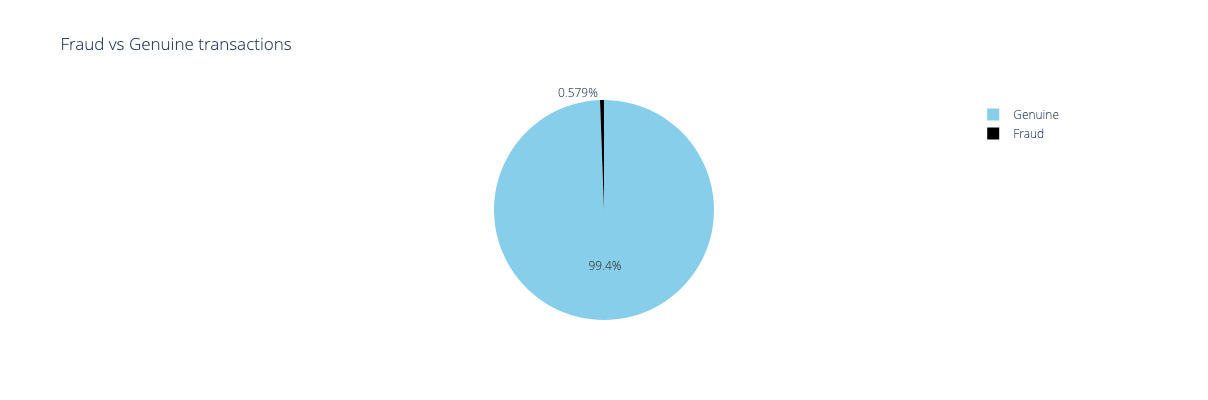

In [22]:
fig = px.pie(values=raw_df["is_fraud"].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

This pie chart below highlights the significant imbalance in our dataset, with the vast majority of transactions being non-fraudulent. Specifically, 

* 99.42% (1289169 / 1296675) of the data represents non-fraudulent transactions

* 0.58% (7506 / 1296675) are labeled as fraudulent.


This imbalance poses a challenge for model evaluation, as using accuracy as a performance metric could be misleading—yielding high accuracy simply due to the prevalence of non-fraudulent transactions. To ensure a more realistic assessment, we should consider alternative metrics like precision, recall, or F1-score, which better account for the minority class.

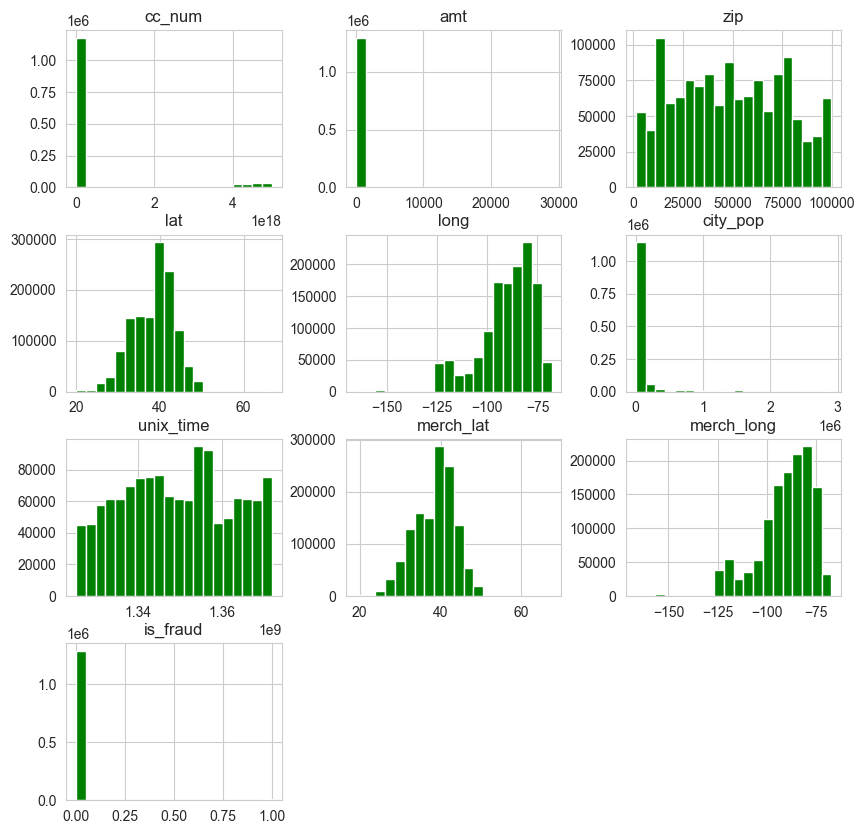

In [25]:
raw_df.hist(bins = 20, figsize = (10,10), color = 'g');

In [26]:
# import folium

# # Create a base map centered at the mean of latitude and longitude
# map_fraud = folium.Map(location=[train_df['lat'].mean(), train_df['long'].mean()], zoom_start=1)

# # Iterate through the DataFrame to add markers with different colors
# for index, row in train_df.iterrows():
#     # Set the marker color based on 'is_fraud' column
#     marker_color = 'red' if row['is_fraud'] == 1 else 'blue'
    
#     # Add a marker to the map
#     folium.Marker(
#         location=[row['lat'], row['long']],
#         popup=f"customer: {row['first']}, Fraud: {row['is_fraud']}",
#         icon=folium.Icon(color=marker_color)
#     ).add_to(map_fraud)

# # Display the map
# map_fraud

Text(0.5, 1.0, 'Amount Distribution by Fraud')

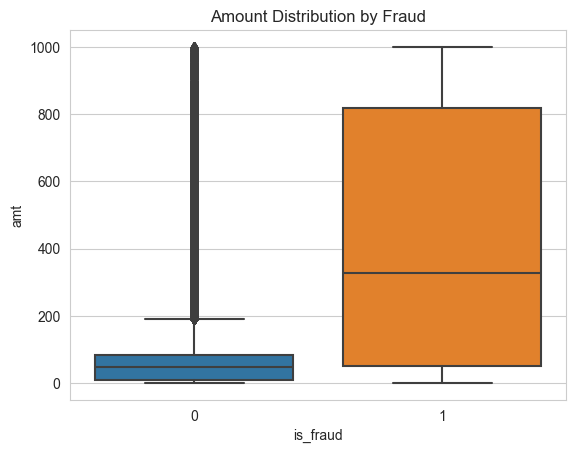

In [29]:
amount_df = processed_df.query('amt < 1000')

sns.boxplot(x='is_fraud', y='amt', data=amount_df)
plt.title('Amount Distribution by Fraud')


In [31]:
columns = list(processed_df.columns)
columns

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

## Display unique values in the all fraud dataset

In [34]:
uniq_values = processed_df.nunique()
uniq_values

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [35]:
fraud_df = processed_df.query('is_fraud == 1')
fraud_df.head(2)

trans_date_trans_time           cc_num                          merchant  \
2449   2019-01-02 01:06:37    4613314721966            fraud_Rutherford-Mertz   
2472   2019-01-02 01:47:29  340187018810220  fraud_Jenkins, Hauck and Friesen   

           category     amt  first    last gender                     street  \
2449    grocery_pos  281.06  Jason  Murphy      M  542 Steve Curve Suite 011   
2472  gas_transport   11.52  Misty    Hart      F  27954 Hall Mill Suite 575   

               city  ...      lat     long  city_pop  \
2449  Collettsville  ...  35.9946 -81.7266       885   
2472    San Antonio  ...  29.4400 -98.4590   1595797   

                           job         dob                         trans_num  \
2449            Soil scientist  1988-09-15  e8a81877ae9a0a7f883e15cb39dc4022   
2472  Horticultural consultant  1960-10-28  bc7d41c41103877b03232f03f1f8d3f5   

       unix_time  merch_lat  merch_long  is_fraud  
2449  1325466397  36.430124  -81.179483         1  
2472  1325468849  29.819364  -99.142791         1  

[2 rows x 22 columns]

In [36]:
# Calculate unique category counts
states_counts = fraud_df['state'].value_counts().reset_index()
states_counts

state  count
0     NY    555
1     TX    479
2     PA    458
3     CA    326
4     OH    321
5     FL    281
6     IL    248
7     MI    238
8     AL    215
9     MN    207
10    VA    198
11    SC    193
12    MO    191
13    NE    180
14    WI    163
15    AR    161
16    MD    157
17    KS    156
18    KY    155
19    OR    149
20    NC    149
21    GA    146
22    WV    146
23    OK    143
24    IA    142
25    IN    142
26    TN    140
27    ME    119
28    NJ    118
29    MS    115
30    CO    113
31    WY    110
32    WA     96
33    LA     91
34    NM     82
35    SD     74
36    VT     72
37    MA     69
38    UT     61
39    NH     59
40    ND     57
41    NV     47
42    AZ     37
43    AK     36
44    MT     32
45    DC     21
46    CT     16
47    RI     15
48    ID     11
49    DE      9
50    HI      7

In [40]:
# Calculate unique job counts
job_counts = fraud_df['job'].value_counts().reset_index()
job_counts

job  count
0                      Materials engineer     62
1               Trading standards officer     56
2                         Naval architect     53
3                     Exhibition designer     51
4                Surveyor, land/geomatics     50
..                                    ...    ...
438                          Statistician      3
439                      Health physicist      3
440               Chartered loss adjuster      3
441  English as a second language teacher      2
442                            Contractor      2

[443 rows x 2 columns]

In [42]:
# Calculate unique city counts
city_counts = fraud_df['city'].value_counts().reset_index()
city_counts

city  count
0           Houston     39
1            Warren     33
2        Huntsville     29
3            Naples     29
4            Dallas     27
..              ...    ...
697        Florence      3
698         Kilgore      2
699         Phoenix      2
700     Phenix City      2
701  Denham Springs      2

[702 rows x 2 columns]

In [44]:
# Calculate unique zip counts
zip_counts = fraud_df['zip'].value_counts().reset_index()
zip_counts

zip  count
0    15010     24
1    48088     23
2    16034     21
3    82514     21
4    68375     19
..     ...    ...
749  33811      2
750  36869      2
751  85020      2
752  28405      2
753  70726      2

[754 rows x 2 columns]

In [46]:
# Calculate unique category counts
category_counts = fraud_df['category'].value_counts().reset_index()
category_counts

category  count
0      grocery_pos   1743
1     shopping_net   1713
2         misc_net    915
3     shopping_pos    843
4    gas_transport    618
5         misc_pos    250
6        kids_pets    239
7    entertainment    233
8    personal_care    220
9             home    198
10     food_dining    151
11     grocery_net    134
12  health_fitness    133
13          travel    116

In [48]:
# Calculate unique job counts
job_counts = fraud_df['job'].value_counts().reset_index()
job_counts

job  count
0                      Materials engineer     62
1               Trading standards officer     56
2                         Naval architect     53
3                     Exhibition designer     51
4                Surveyor, land/geomatics     50
..                                    ...    ...
438                          Statistician      3
439                      Health physicist      3
440               Chartered loss adjuster      3
441  English as a second language teacher      2
442                            Contractor      2

[443 rows x 2 columns]

In [50]:
# Calculate unique merchant counts
merchant_counts = fraud_df['merchant'].value_counts().reset_index()
merchant_counts

merchant  count
0        fraud_Rau and Sons     49
1         fraud_Cormier LLC     48
2         fraud_Kozey-Boehm     48
3           fraud_Doyle Ltd     47
4     fraud_Vandervort-Funk     47
..                      ...    ...
674        fraud_Kuphal-Toy      1
675  fraud_Eichmann-Kilback      1
676        fraud_Lynch-Mohr      1
677       fraud_Tillman LLC      1
678       fraud_Hills-Olson      1

[679 rows x 2 columns]

# !!!!!! TODO: DELETE OUTLIERS (OR NOT)

In [53]:
columns

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [55]:
boxplot_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

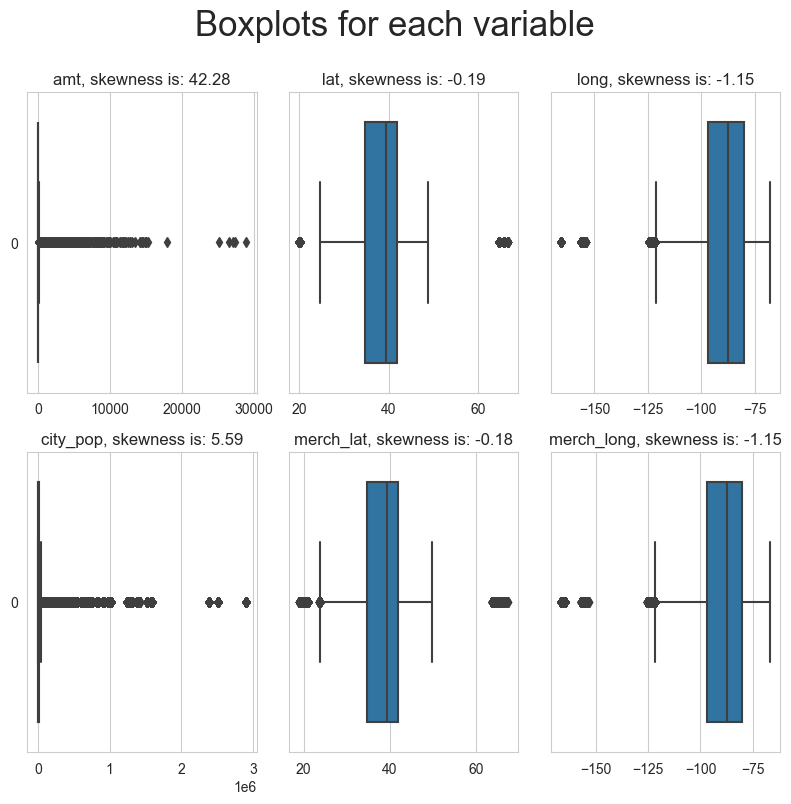

In [57]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(8,8))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=processed_df, columns_list=boxplot_columns, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

### Add Age as a feature

In [60]:
# Convert columns to datetime
processed_df['trans_date_trans_time'] = pd.to_datetime(processed_df['trans_date_trans_time'])
processed_df['dob'] = pd.to_datetime(processed_df['dob'])

# Extract the year from 'trans_date_trans_time' and 'dob'
processed_df['trans_year'] = processed_df['trans_date_trans_time'].dt.year
processed_df['dob_year'] = processed_df['dob'].dt.year

# Display the DataFrame with the extracted years
processed_df[['trans_date_trans_time', 'dob', 'trans_year', 'dob_year']]
processed_df['age'] = processed_df['trans_year'] - processed_df['dob_year']

# Add age column to fraud dataframe
fraud_df = fraud_df.reset_index(drop=True)
processed_df = processed_df.reset_index(drop=True)

# Assign the 'age' column
fraud_df['age'] = processed_df['age']

processed_df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...                                job  \
0                  Moravian Falls  ...          Psychologist, counselling   
1                          Orient  ...  Special educational needs teacher   
2                      Malad City  ...        Nature conservation officer   
3                         Boulder  ...                    Patent attorney   
4                        Doe Hill  ...     Dance movement psychotherapist   
...                           ...  ...                                ...   
1296670                     Hatch  ...                       Geoscientist   
1296671                 Tuscarora  ...   Production assistant, television   
1296672  High Rolls Mountain Park  ...                    Naval architect   
1296673                 Manderson  ...              Volunteer coordinator   
1296674                      Sula  ...           Therapist, horticultural   

               dob                         trans_num   unix_time  merch_lat  \
0       1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1       1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2       1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3       1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4       1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...            ...                               ...         ...        ...   
1296670 1961-11-24  440b587732da4dc1a6395aba5fb41669  1371816728  36.841266   
1296671 1979-12-11  278000d2e0d2277d1de2f890067dcc0a  1371816739  38.906

In [62]:
# Calculate unique category counts
age_counts = fraud_df['age'].value_counts().reset_index()
age_counts

age  count
0    47    255
1    34    220
2    32    217
3    45    216
4    35    214
..  ...    ...
75   86     16
76   16     16
77   89     12
78   14      9
79   95      1

[80 rows x 2 columns]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



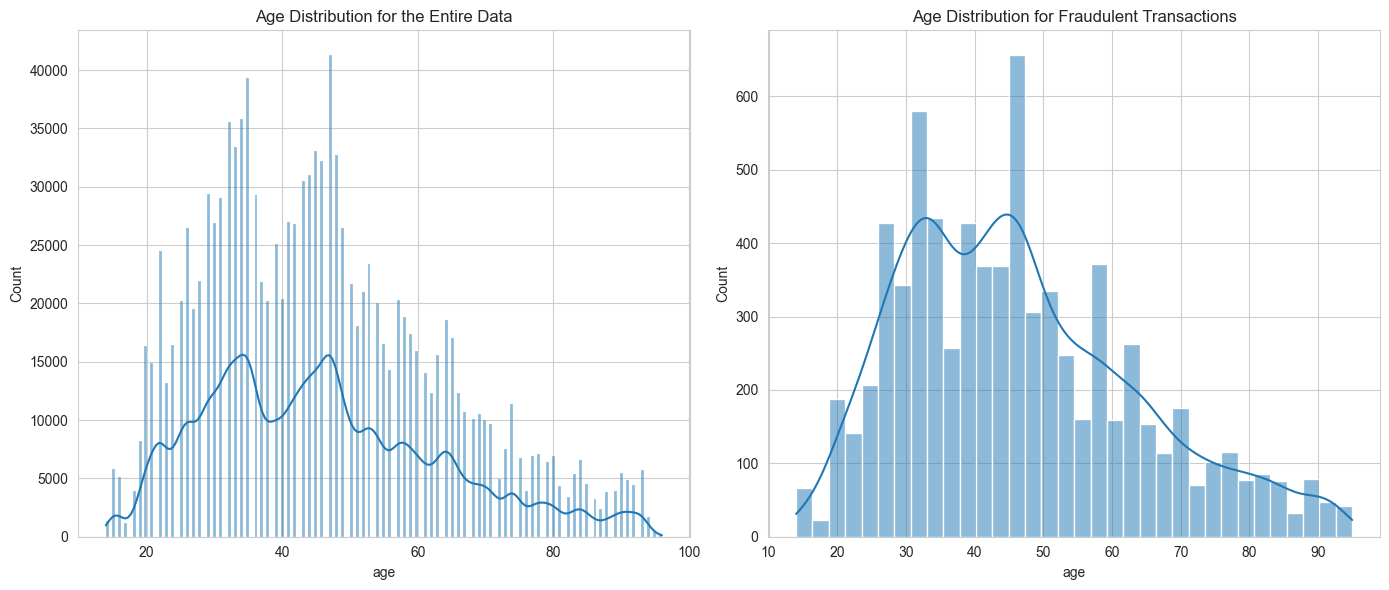

In [64]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot age distribution for the entire dataset
sns.histplot(data=processed_df, x='age', kde=True, ax=axes[0])
axes[0].set_title('Age Distribution for the Entire Data')

# Plot age distribution for fraudulent transactions
sns.histplot(data=fraud_df, x='age', kde=True, ax=axes[1])
axes[1].set_title('Age Distribution for Fraudulent Transactions')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

#### Observation:

The distribution on the right indicates that fraudulent transactions are most concentrated among individuals aged **30 to 50**, with notable peaks in the **early 30s** and **late 40s**. This suggests that individuals in these age brackets may be more susceptible to engaging in or being targeted by fraud. The increased prevalence in these specific age ranges highlights key segments that require closer monitoring in fraud detection efforts.

In [67]:
# Calculate unique city population counts
city_pop_counts = fraud_df['city_pop'].value_counts().reset_index()
city_pop_counts.head(20)

city_pop  count
0    2906700     39
1     276002     29
2     190178     29
3        302     29
4     413574     27
5    1263321     27
6        277     27
7     163415     27
8     673342     26
9        471     26
10   1595797     25
11      1725     24
12       824     24
13    641349     24
14     28425     24
15       341     24
16    172247     24
17       239     24
18       365     24
19    134056     23

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



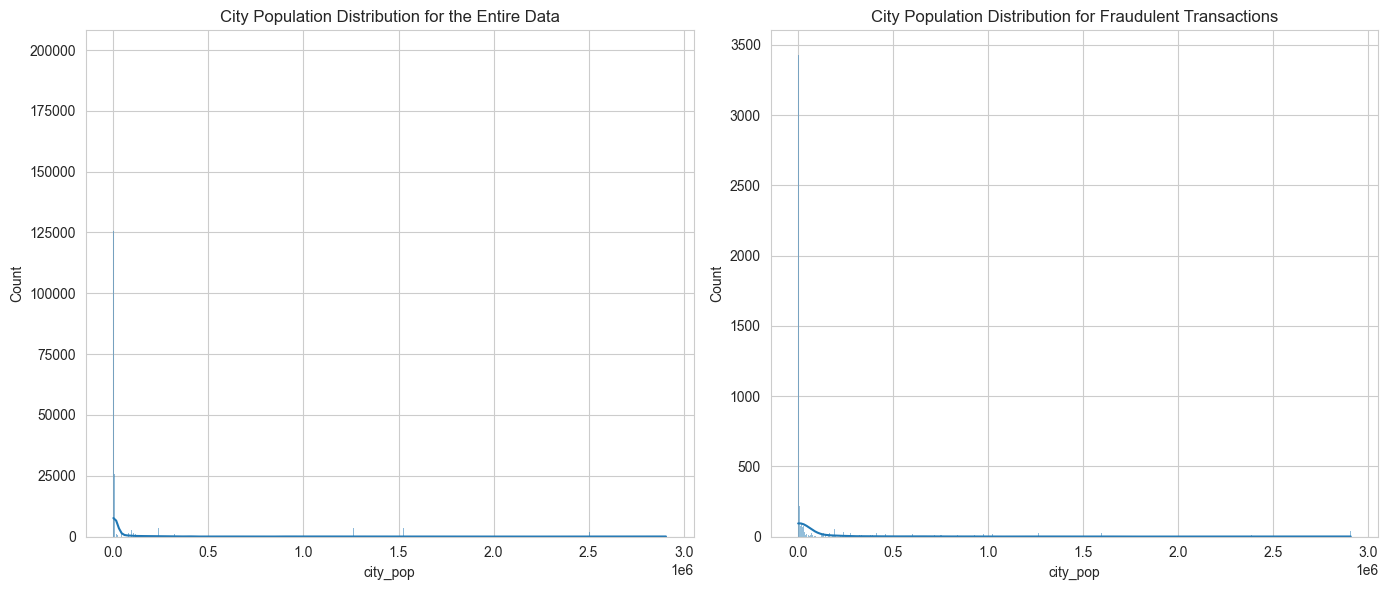

In [69]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot age distribution for the entire dataset
sns.histplot(data=processed_df, x='city_pop', kde=True, ax=axes[0])
axes[0].set_title('City Population Distribution for the Entire Data')

# Plot age distribution for fraudulent transactions
sns.histplot(data=fraud_df, x='city_pop', kde=True, ax=axes[1])
axes[1].set_title('City Population Distribution for Fraudulent Transactions')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

### Observation

The data suggests that fraudulent transactions are not limited to large cities but are also present in smaller populations. The highest count of fraud cases (39) is observed in a city with a population of 2,906,700, indicating that larger populations might see more fraud activity due to the sheer volume of transactions. However, there are also multiple instances of fraud in cities with populations as low as 277, 302, and 365, each with 24 to 27 cases. This indicates that fraud is a widespread issue, affecting both large metropolitan areas and smaller communities. Therefore, fraud detection efforts should consider diverse city sizes, as it is not exclusively a big-city phenomenon.

## Separate features and target variables

In [72]:
features = [
    'category', 
    'amt', 
    'age', 
    'gender',
    'job',
    'city',
    'state',
    'zip',
    'city_pop',
    'lat', 
    'long',
    'merchant',
    'merch_lat', 
    'merch_long',
]

train_df = processed_df[features].copy()

train_df

category     amt  age gender                                job  \
0             misc_net    4.97   31      F          Psychologist, counselling   
1          grocery_pos  107.23   41      F  Special educational needs teacher   
2        entertainment  220.11   57      M        Nature conservation officer   
3        gas_transport   45.00   52      M                    Patent attorney   
4             misc_pos   41.96   33      M     Dance movement psychotherapist   
...                ...     ...  ...    ...                                ...   
1296670  entertainment   15.56   59      M                       Geoscientist   
1296671    food_dining   51.70   41      M   Production assistant, television   
1296672    food_dining  105.93   53      M                    Naval architect   
1296673    food_dining   74.90   40      M              Volunteer coordinator   
1296674    food_dining    4.30   25      M           Therapist, horticultural   

                             city state    zip  city_pop      lat      long  \
0                  Moravian Falls    NC  28654      3495  36.0788  -81.1781   
1                          Orient    WA  99160       149  48.8878 -118.2105   
2                      Malad City    ID  83252      4154  42.1808 -112.2620   
3                         Boulder    MT  59632      1939  46.2306 -112.1138   
4                        Doe Hill    VA  24433        99  38.4207  -79.4629   
...                           ...   ...    ...       ...      ...       ...   
1296670                     Hatch    UT  84735       258  37.7175 -112.4777   
1296671                 Tuscarora    MD  21790       100  39.2667  -77.5101   
1296672  High Rolls Mountain Park    NM  88325       899  32.9396 -105.8189   
1296673                 Manderson    SD  57756      1126  43.3526 -102.5411   
1296674                      Sula    MT  59871       218  45.8433 -113.8748   

                                    merchant  merch_lat  merch_long  
0                 fraud_Rippin, Kub and Mann  36.011293  -82.048315  
1            fraud_Heller, Gutmann and Zieme  49.159047 -118.186462  
2                       fraud_Lind-Buckridge  43.150704 -112.154481  
3         fraud_Kutch, Hermiston and Farrell  47.034331 -112.561071  
4                        fraud_Keeling-Crist  38.674999  -78.632459  
...                                      ...        ...         ...  
1296670                    fraud_Reichel Inc  36.841266 -111.690765  
1296671             fraud_Abernathy and Sons  38.906881  -78.246528  
1296672                 fraud_Stiedemann Ltd  33.619513 -105.130529  
1296673  fraud_Reinger, Weissnat and Strosin  42.788940 -103.241160  
1296674  fraud_Langosh, Wintheiser and Hyatt  46.565983 -114.186110  

[1296675 rows x 14 columns]

In [75]:
target = processed_df['is_fraud']
target

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

### 3. Apply Categorical Encoding

In [78]:
train_df = pd.get_dummies(train_df, columns=['category', 'gender', 'state', 'job', 'city', 'merchant'])

train_df

amt  age    zip  city_pop      lat      long  merch_lat  \
0          4.97   31  28654      3495  36.0788  -81.1781  36.011293   
1        107.23   41  99160       149  48.8878 -118.2105  49.159047   
2        220.11   57  83252      4154  42.1808 -112.2620  43.150704   
3         45.00   52  59632      1939  46.2306 -112.1138  47.034331   
4         41.96   33  24433        99  38.4207  -79.4629  38.674999   
...         ...  ...    ...       ...      ...       ...        ...   
1296670   15.56   59  84735       258  37.7175 -112.4777  36.841266   
1296671   51.70   41  21790       100  39.2667  -77.5101  38.906881   
1296672  105.93   53  88325       899  32.9396 -105.8189  33.619513   
1296673   74.90   40  57756      1126  43.3526 -102.5411  42.788940   
1296674    4.30   25  59871       218  45.8433 -113.8748  46.565983   

         merch_long  category_entertainment  category_food_dining  ...  \
0        -82.048315                   False                 False  ...   
1       -118.186462                   False                 False  ...   
2       -112.154481                    True                 False  ...   
3       -112.561071                   False                 False  ...   
4        -78.632459                   False                 False  ...   
...             ...                     ...                   ...  ...   
1296670 -111.690765                    True                 False  ...   
1296671  -78.246528                   False                  True  ...   
1296672 -105.130529                   False                  True  ...   
1296673 -103.241160                   False                  True  ...   
1296674 -114.186110                   False                  True  ...   

         merchant_fraud_Yost, Schamberger and Windler  \
0                                               False   
1                                               False   
2                                               False   
3                                               False   
4                                               False   
...                                               ...   
1296670                                         False   
1296671                                         False   
1296672                                         False   
1296673                                         False   
1296674                                         False   

         merchant_fraud_Yost-Rogahn  merchant_fraud_Zboncak LLC  \
0                             False                       False   
1                             False                       False   
2                             False                       False   
3                             False                       False   
4                             False                       False   
...                             ...                         ...   
1296670                       False                       False   
1296671                       False                       False   
1296672                       False                       False   
1296673                       False                       False   
1296674                       False                       False   

         merchant_fraud_Zboncak Ltd  merchant_fraud_Zboncak, Rowe and Murazik  \
0                             False                                     False   
1                             False                                     False   
2                             False                                     False   
3                             False                                     False   
4                             False                                     False   
...                             ...                                       ...   
1296670                       False                                     False   
1296671                       False                                     False   
1296672                       False                

### Split the dataset using Stratified

Stratified splitting ensures that when you divide the dataset into training and validation sets, the class distribution remains consistent across each split. This technique maintains the same percentage of each class as found in the original dataset, which is crucial for imbalanced datasets or smaller sample sizes.

Without stratified splitting, the dataset is typically divided randomly based on the target variable. This can lead to variations in class distribution across splits, potentially skewing model performance and evaluation. By preserving the class proportions, stratified splitting provides more representative training and validation sets, resulting in more reliable and accurate model assessments.

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, target, stratify=target, test_size=0.2, random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (1037340, 2156)
Shape of X_test: (259335, 2156)
Shape of y_train: (1037340,)
Shape of y_test: (259335,)


In [83]:
X_columns = X_train.columns
X_columns

Index(['amt', 'age', 'zip', 'city_pop', 'lat', 'long', 'merch_lat',
       'merch_long', 'category_entertainment', 'category_food_dining',
       ...
       'merchant_fraud_Yost, Schamberger and Windler',
       'merchant_fraud_Yost-Rogahn', 'merchant_fraud_Zboncak LLC',
       'merchant_fraud_Zboncak Ltd',
       'merchant_fraud_Zboncak, Rowe and Murazik',
       'merchant_fraud_Zemlak Group',
       'merchant_fraud_Zemlak, Tillman and Cremin',
       'merchant_fraud_Ziemann-Waters',
       'merchant_fraud_Zieme, Bode and Dooley', 'merchant_fraud_Zulauf LLC'],
      dtype='object', length=2156)

### 4. Scaling the dataset

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (1037340, 2156)
Shape of X_test: (259335, 2156)


## Training the model

In [89]:
from sklearn.linear_model import LogisticRegression

In [91]:
lr_model = LogisticRegression(max_iter=150, random_state=42)

In [93]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=150, random_state=42)

## Prediction

In [96]:
lr_predictions = lr_model.predict(X_test)
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])

## Evaluation

### A.Confusion matrix
All binary classifiers of scikit-learn use a fixed decision threshold of 0.5 to convert probability estimates (i.e. output of predict_proba) into class predictions. However, 0.5 is almost never the desired threshold for a given problem. [FixedThresholdClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.FixedThresholdClassifier.html#sklearn.model_selection.FixedThresholdClassifier) allows wrapping any binary classifier and setting a custom decision threshold.

array([[257727,    107],
       [  1335,    166]])

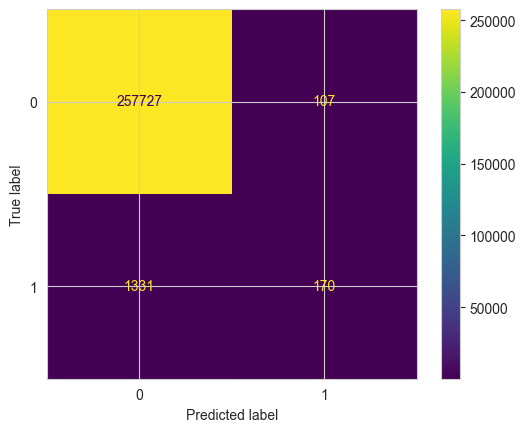

In [99]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

classifier_05 = LogisticRegression(C=1e6, random_state=0).fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(classifier_05, X_test, y_test)

lr_confusion_score = confusion_matrix(y_test, lr_predictions)
lr_confusion_score

In [100]:
# Print the accuracy rate of the model
accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Print classification report with zero_division=1 to avoid warnings
report = classification_report(y_test, lr_predictions, zero_division=1)
print(f"\nClassification Report:\n{report}")

Logistic Regression Accuracy: 0.9944

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.61      0.11      0.19      1501

    accuracy                           0.99    259335
   macro avg       0.80      0.56      0.59    259335
weighted avg       0.99      0.99      0.99    259335



#### Outcome Explanation:

The logistic regression model correctly identifies fraudulent transaction with 61% correctness, but it can only identifies 11% of actual fraudulent transactions, which means that most fraudulent transactions are missed. This low recall is critical because, in fraud detection, catching as many fraudulent cases as possible is often more important.

### B. When is Precision more important over Recall?

Precision is more important than Recall when you would like to have less False Positives 
in trade off to have more False Negatives. Meaning, getting a False Positive is very costly, and a False Negative is not as much.

Imagine a zombie apocalypse. You would try to accept as many healthy people as you can into your safe zone, 
but you really dont want to mistakenly pass a zombie. The true positive is this case is a healthy person and false positive a zombie. It is more important to avoid zombies than accepting more healthy people. So you create a method that causes some of the healthy people mistakenly not to get into the safe zone, but this is the cost of not letting a zombie in.

## Compare different model performance

In [106]:
import xgboost as xgb
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from pickle import dump

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [108]:
divider = "-"* 50 + "\n"
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, suffix=""):
    start_time = time.time()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print the accuracy rate of the model
    accuracy = accuracy_score(y_test, y_pred)
    modelName = model.__class__.__name__ 
    print(f"{modelName} Accuracy: {accuracy:.4f}")
    
    # Display confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

    # Print classification report with zero_division=1 to avoid warnings
    report = classification_report(y_test, y_pred, zero_division=1)
    print(f"\nClassification Report:\n{report}")
    
    # Store the serialized model into file using pickle.dump
    filename = modelName + suffix + '.pkl'
    with open(filename, "wb") as file:
        dump(model, file)
        
    print(f"Model saved as {filename}")
    
    # Calculate the total time taken
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Time taken for execution: {elapsed_time:.2f} seconds")
    
    print(divider)

XGBClassifier Accuracy: 0.9940

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.47      0.28      0.35      1501

    accuracy                           0.99    259335
   macro avg       0.73      0.64      0.67    259335
weighted avg       0.99      0.99      0.99    259335

Model saved as XGBClassifier.pkl
Time taken for execution: 19.28 seconds
--------------------------------------------------



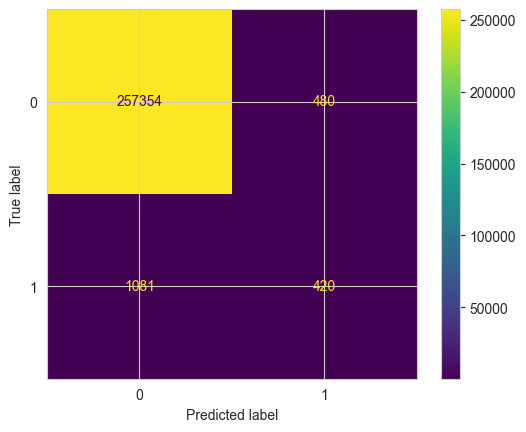

In [112]:
# With 2156 features, it took 19.28 seconds to execute

xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test)

RandomForestClassifier Accuracy: 0.9969

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.91      0.53      0.67      1501

    accuracy                           1.00    259335
   macro avg       0.95      0.76      0.83    259335
weighted avg       1.00      1.00      1.00    259335

Model saved as RandomForestClassifier.pkl
Time taken for execution: 767.41 seconds
--------------------------------------------------



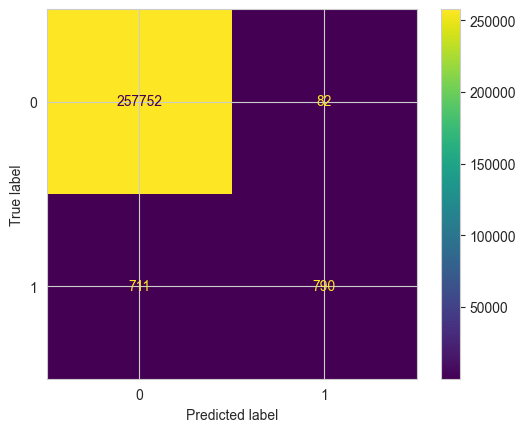

In [110]:
# With 2156 features, it took 767.41 seconds to execute

rfc_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rfc_model, X_train, X_test, y_train, y_test)

DecisionTreeClassifier Accuracy: 0.9934

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.45      0.63      0.52      1501

    accuracy                           0.99    259335
   macro avg       0.72      0.81      0.76    259335
weighted avg       0.99      0.99      0.99    259335

Model saved as DecisionTreeClassifier.pkl
Time taken for execution: 216.69 seconds
--------------------------------------------------



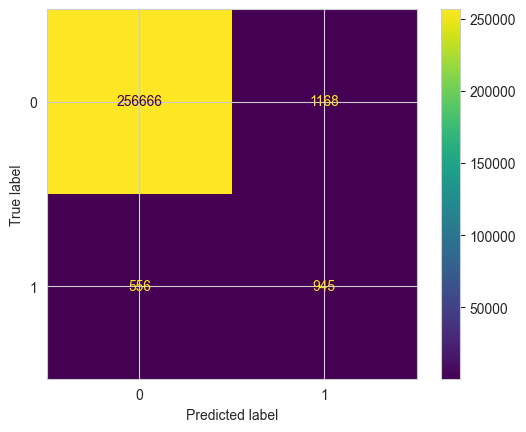

In [116]:
# With 2156 features, it took 216.69 seconds to execute

dtc_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dtc_model, X_train, X_test, y_train, y_test)

GaussianNB Accuracy: 0.9948

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       1.00      0.10      0.18      1501

    accuracy                           0.99    259335
   macro avg       1.00      0.55      0.59    259335
weighted avg       0.99      0.99      0.99    259335

Model saved as GaussianNB.pkl
Time taken for execution: 42.27 seconds
--------------------------------------------------



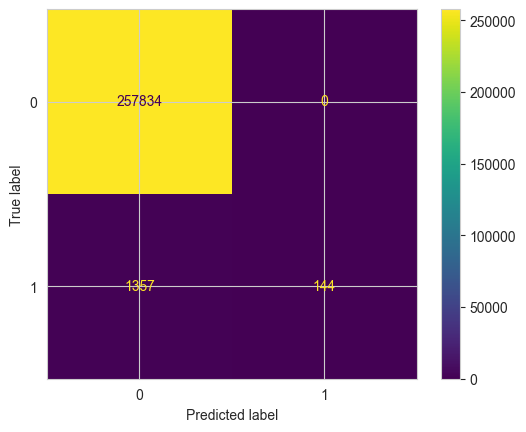

In [114]:
# With 2156 features, it took 49.21 seconds to execute

gnb_model = GaussianNB()
evaluate_and_save_model(gnb_model, X_train, X_test, y_train, y_test)

In [105]:
# Takes a lot of time. SVC model is useful for anomaly detection.

# svc_model = SVC(probability=True, class_weight='balanced')
# evaluate_and_save_model(svc_model, X_train, X_test, y_train, y_test)

In [106]:
# Takes a lot of time. KNearest neighbors is useful for anomaly detection

# knc_model = KNeighborsClassifier()
# evaluate_and_save_model(knc_model, X_train, X_test, y_train, y_test)

### Recall as the preferred metric

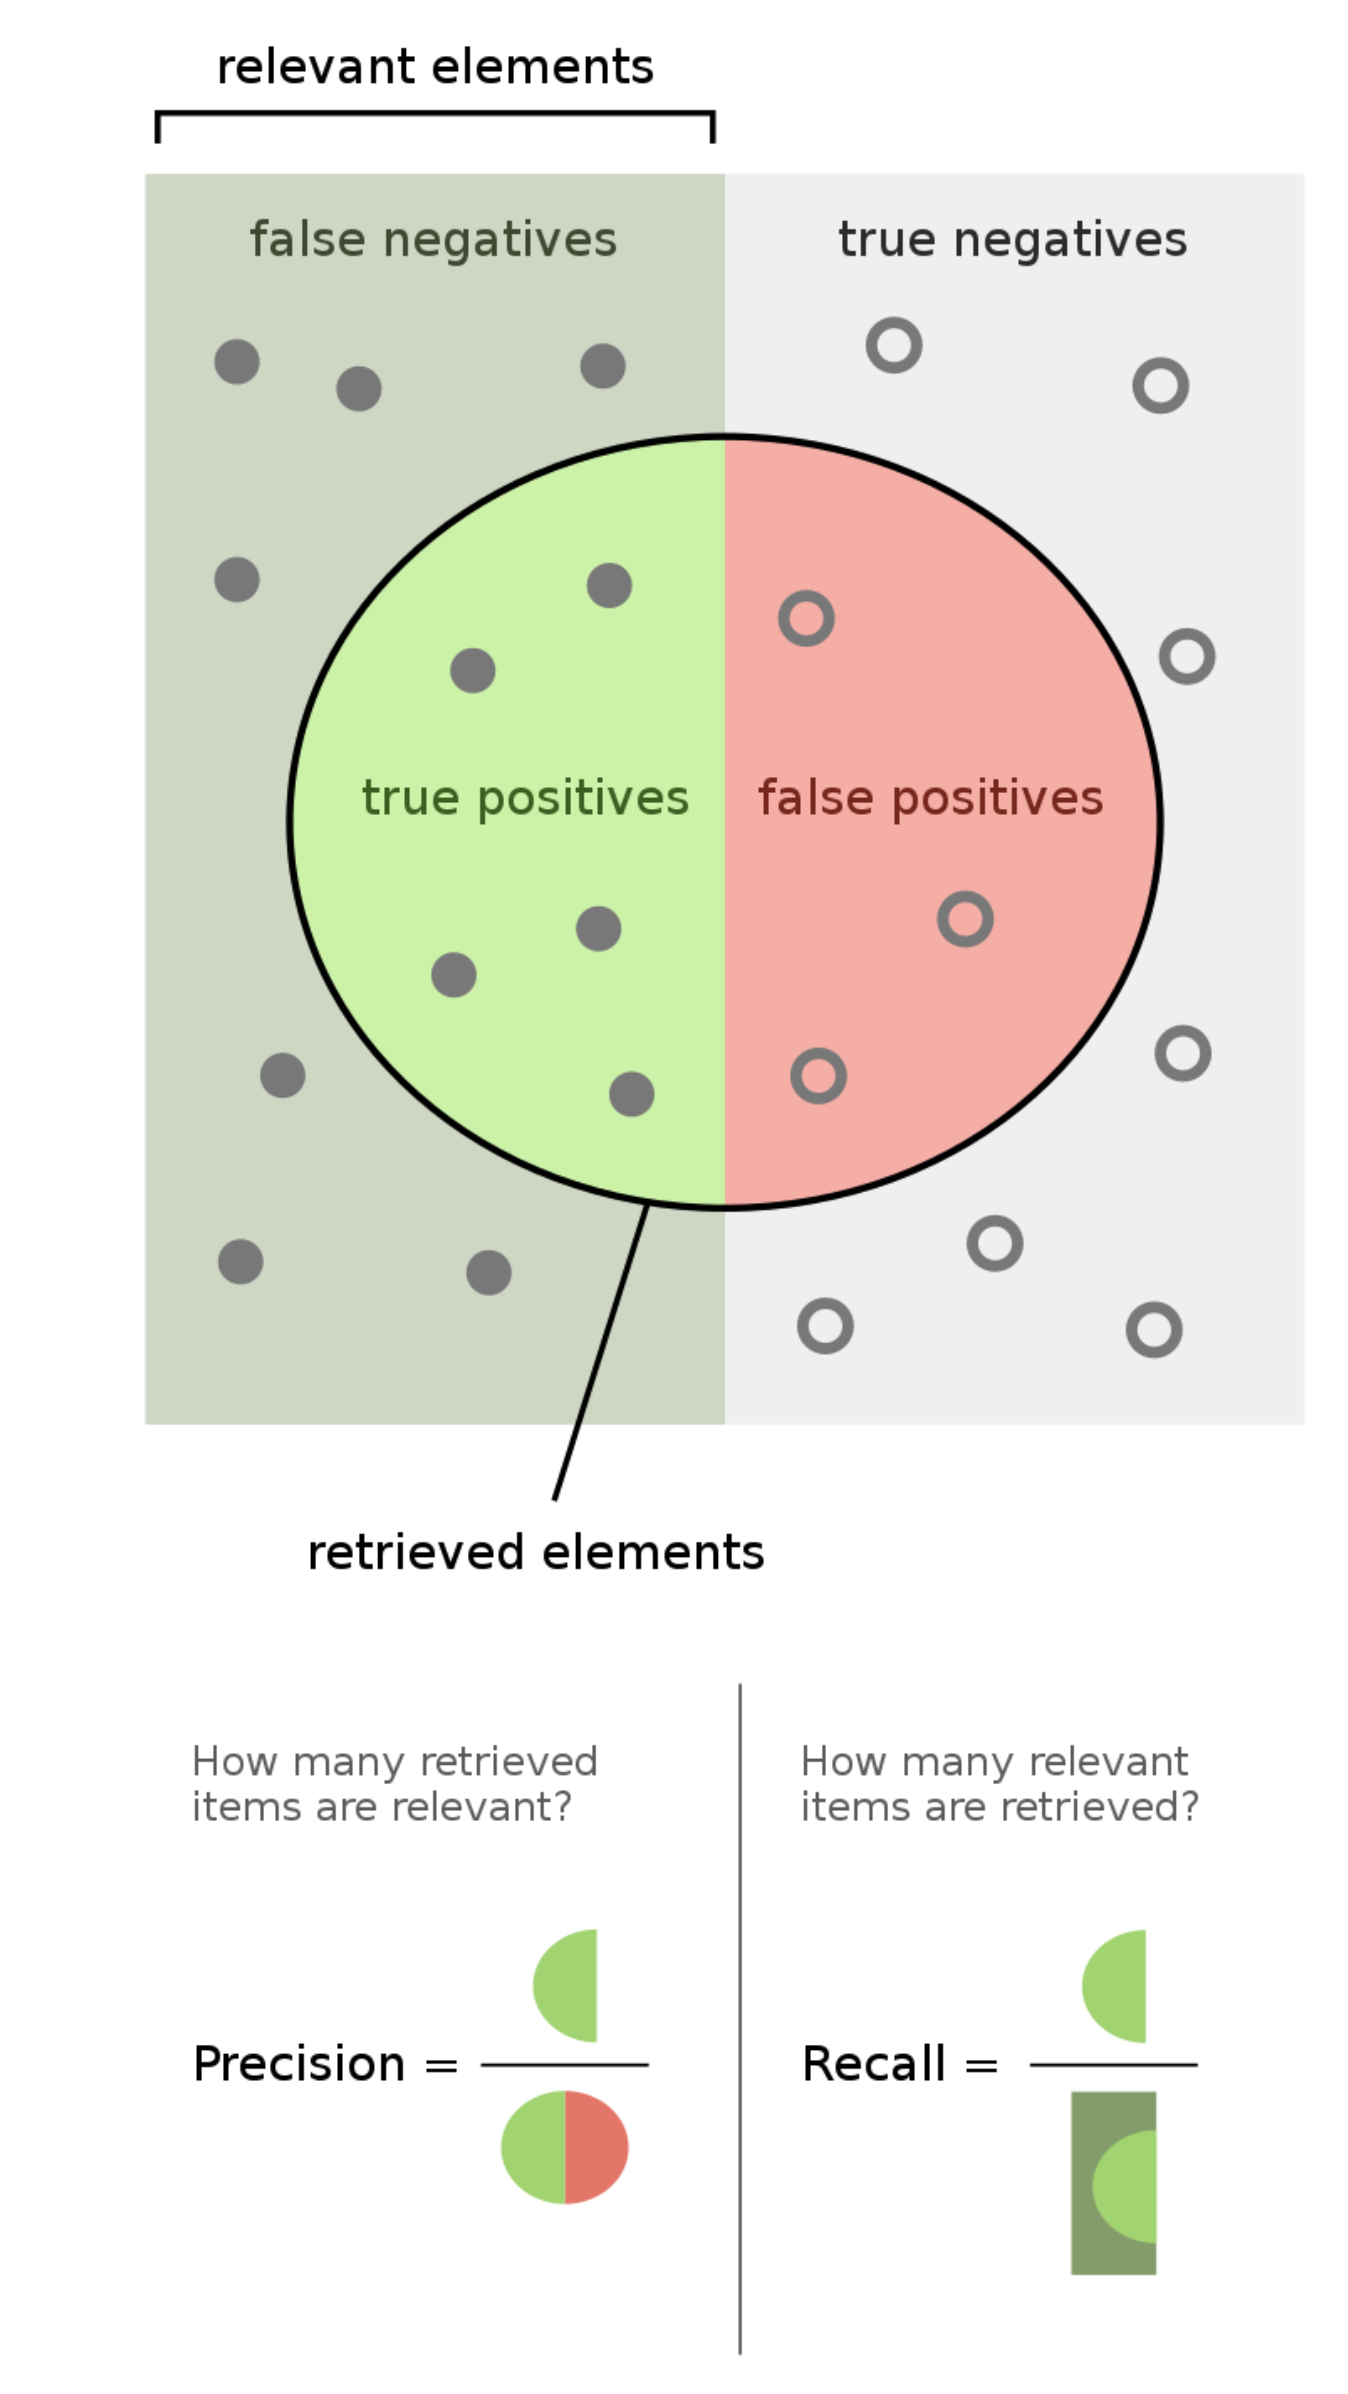

Recall: The ability of a model to find all the relevant cases within a data set. The number of true positives divided by the number of true positives plus the number of false negatives.

In most high-risk detection cases (like cancer), recall is a more important evaluation metric than precision.

In the case of credit card fraud detection, we want to avoid false negatives as much as possible. Fraud transactions cost us a lot and thus we want to take appropriate measures to prevent them. A false negative case means that a fraud-positive transaction is assessed to genuine transaction, which is detrimental. In this use case, false positives (a genuine transaction as fraud-positive) are not as important as preventing a fraud.

### Feature importance

Size of feature importances: 2156, Size of feature names: 2156


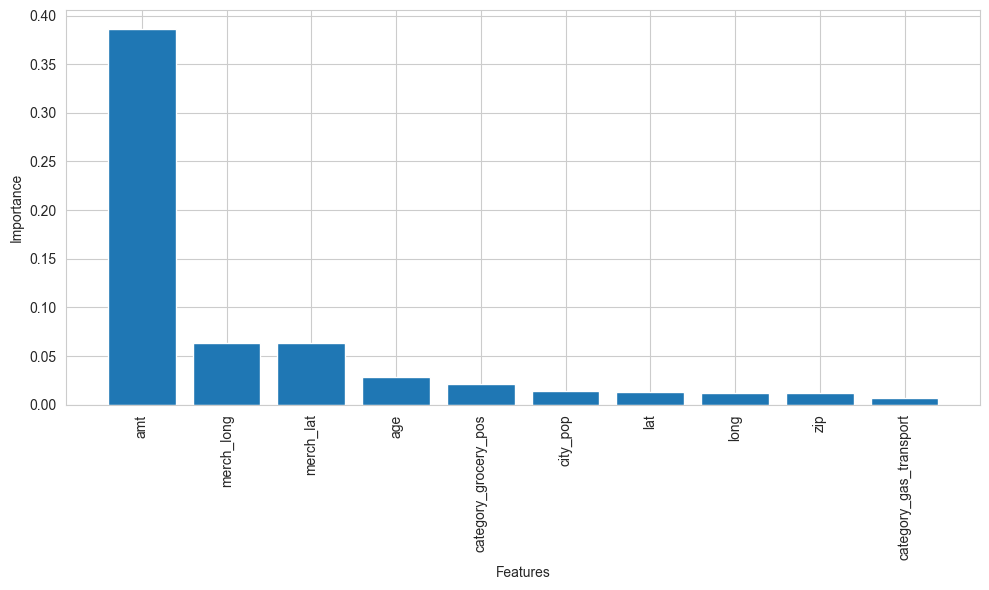

In [118]:
feature_importances = rfc_model.feature_importances_
feature_names = train_df.columns

print(f'Size of feature importances: {len(feature_importances)}, Size of feature names: {len(feature_names)}')

feature_importances_df = pd.DataFrame({
    'features': feature_names,
    'importance': feature_importances
})

# Sort the results
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['features'][:10], feature_importances_df['importance'][:10])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

## Performance Improvement

### A.1. Feature Selection

* Minimize jobs to 5 bins
* Remove city, city_pop, merchant

In [121]:
modified_df = processed_df.copy()
modified_df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...                                job  \
0                  Moravian Falls  ...          Psychologist, counselling   
1                          Orient  ...  Special educational needs teacher   
2                      Malad City  ...        Nature conservation officer   
3                         Boulder  ...                    Patent attorney   
4                        Doe Hill  ...     Dance movement psychotherapist   
...                           ...  ...                                ...   
1296670                     Hatch  ...                       Geoscientist   
1296671                 Tuscarora  ...   Production assistant, television   
1296672  High Rolls Mountain Park  ...                    Naval architect   
1296673                 Manderson  ...              Volunteer coordinator   
1296674                      Sula  ...           Therapist, horticultural   

               dob                         trans_num   unix_time  merch_lat  \
0       1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1       1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2       1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3       1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4       1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...            ...                               ...         ...        ...   
1296670 1961-11-24  440b587732da4dc1a6395aba5fb41669  1371816728  36.841266   
1296671 1979-12-11  278000d2e0d2277d1de2f890067dcc0a  1371816739  38.906

### K-Means for job clustering

In [205]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans

# job_titles = ['Technical and Engineering Professional',
#               'Healthcare, Education, and Research Professional',
#               'Public Service, Administration, and Community Development Professional',
#               'Creative, Media, and Communication Specialist',
#               'Legal, Finance, and Compliance Expert'
#              ]

# # Get the unique jobs from the DataFrame
# unique_jobs = list(modified_df['job'].unique())

# # Combine job titles and unique jobs for vectorization
# combined_jobs = job_titles + unique_jobs

# # Vectorize job titles using TF-IDF
# vectorizer = TfidfVectorizer(stop_words='english')
# vectorized_df = vectorizer.fit_transform(combined_jobs)

# # Apply KMeans clustering
# num_clusters = len(job_titles)
# kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
# kmeans.fit(vectorized_df)

# # Create a mapping of unique jobs to cluster labels
# job_cluster_mapping = {job: job_titles[label] for job, label in zip(unique_jobs, kmeans.labels_[len(job_titles):])}

# # Map clusters to the original DataFrame
# modified_df['job_category'] = modified_df['job'].map(job_cluster_mapping)

# # Drop job column
# if 'job' in modified_df.columns:
#     modified_df = modified_df.drop(columns=['job'])
    
# modified_df

### B. Feature Engineering
* Age grouping
* Distance from home
* Ratio_to_median_purchase price

### Feature Engineering: Age grouping

In [123]:
bins = [0, 32, 47, 75, 100]
labels = ['Early', 'MiddleAge', 'Senior', 'Elderly']


modified_df['ageGroup'] = pd.cut(modified_df['age'], bins=bins, labels=labels)
modified_df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...        dob  \
0                  Moravian Falls  ... 1988-03-09   
1                          Orient  ... 1978-06-21   
2                      Malad City  ... 1962-01-19   
3                         Boulder  ... 1967-01-12   
4                        Doe Hill  ... 1986-03-28   
...                           ...  ...        ...   
1296670                     Hatch  ... 1961-11-24   
1296671                 Tuscarora  ... 1979-12-11   
1296672  High Rolls Mountain Park  ... 1967-08-30   
1296673                 Manderson  ... 1980-08-18   
1296674                      Sula  ... 1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1296670  440b587732da4dc1a6395aba5fb41669  1371816728  36.841266 -111.690765   
1296671  278000d2e0d2277d1de2f890067dcc0a  1371816739  38.906881  -78.246528   
1296672  483f52fe67fabef353d552c1e662974c  1371816752  33.619513 -105.130529   
1296673  d667cdcbadaaed3da3f4020e83591c83  1371816816  42.788940 -103.241160   
1296674  8f7c8e4ab7f25875d753b422917c98c9  1371816817  46.565983 -114.186110   

        is_fraud trans_year dob

### Feature Engineering: Euclidean distance from home

In [212]:
# Calculate Euclidean distance
# modified_df['euclidean_distance'] = np.sqrt(
#     (modified_df['lat'] - modified_df['merch_lat'])**2 + (modified_df['long'] - modified_df['merch_long'])**2
# )
# modified_df

### Feature Engineering: Ratio to median purchase price

In [125]:
# Assume 'price' is the column of interest
median_price = modified_df['amt'].median()

# Create a new column 'price_ratio_to_median'
modified_df['price_ratio_to_median'] = modified_df['amt'] / median_price
modified_df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...                         trans_num  \
0                  Moravian Falls  ...  0b242abb623afc578575680df30655b9   
1                          Orient  ...  1f76529f8574734946361c461b024d99   
2                      Malad City  ...  a1a22d70485983eac12b5b88dad1cf95   
3                         Boulder  ...  6b849c168bdad6f867558c3793159a81   
4                        Doe Hill  ...  a41d7549acf90789359a9aa5346dcb46   
...                           ...  ...                               ...   
1296670                     Hatch  ...  440b587732da4dc1a6395aba5fb41669   
1296671                 Tuscarora  ...  278000d2e0d2277d1de2f890067dcc0a   
1296672  High Rolls Mountain Park  ...  483f52fe67fabef353d552c1e662974c   
1296673                 Manderson  ...  d667cdcbadaaed3da3f4020e83591c83   
1296674                      Sula  ...  8f7c8e4ab7f25875d753b422917c98c9   

          unix_time  merch_lat  merch_long  is_fraud trans_year dob_year age  \
0        1325376018  36.011293  -82.048315         0       2019     1988  31   
1        1325376044  49.159047 -118.186462         0       2019     1978  41   
2        1325376051  43.150704 -112.154481         0       2019     1962  57   
3        1325376076  47.034331 -112.561071         0       2019     1967  52   
4        1325376186  38.674999  -78.632459         0       2019     1986  33   
...             ...        ...         ...       ...        ...      ...  ..   
1296670  1371816728  36.841266 -111.690765         0       2020     1961  59   
1296671  1371816739  38.906881  -78.246528         0       2020     1979  41

### One-hot Encoding (More efficient than get_dummy encoding)


One-hot encoding is a technique used to convert categorical data into a numerical format that machine learning models can understand. It transforms each category into a binary vector.

#### To fix train-test skew in categorical data:

Categories in Training but not in Testing: Categorical types save all categories seen during training. Missing categories in testing are filled with NaN.

Categories in Testing but not in Training: One-hot encoding with categorical types removes extra columns in the test set that aren't in the training set.

Using categorical types ensures consistent column alignment across training and testing, unlike pd.get_dummies() on string columns, which can lead to mismatches.

In [128]:
categorical_cols = ['category', 'state', 'ageGroup', 'gender']
# Convert specified columns to 'category' dtype
modified_df[categorical_cols] = modified_df[categorical_cols].astype('category')

# Categorical encoding using .cat.codes
for col in categorical_cols:
    modified_df[f'{col}_codes'] = modified_df[col].cat.codes
modified_df

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ... is_fraud  trans_year  dob_year  age  \
0                  Moravian Falls  ...        0        2019      1988   31   
1                          Orient  ...        0        2019      1978   41   
2                      Malad City  ...        0        2019      1962   57   
3                         Boulder  ...        0        2019      1967   52   
4                        Doe Hill  ...        0        2019      1986   33   
...                           ...  ...      ...         ...       ...  ...   
1296670                     Hatch  ...        0        2020      1961   59   
1296671                 Tuscarora  ...        0        2020      1979   41   
1296672  High Rolls Mountain Park  ...        0        2020      1967   53   
1296673                 Manderson  ...        0        2020      1980   40   
1296674                      Sula  ...        0        2020      1995   25   

          ageGroup price_ratio_to_median category_codes state_codes  \
0            Early              0.104588              8          27   
1        MiddleAge              2.256524              4          47   
2           Senior              4.631944              0          13   
3           Senior              0.946970              2          26   
4        MiddleAge              0.882997              9          45   
...            ...                   ...            ...         ...   
1296670     Senior              0.327441              0          44   
1296671  MiddleAge              1.087963              1          20   
1296672     Senior              2.229167             

### Store to .csv file

In [168]:
# Export the modified DataFrame to a .csv file
path = 'modified_df.csv'
modified_df.to_csv(path, index=False)

#### Category mappings

In [130]:
# Create a dictionary to store the mappings
category_mappings = {}

# Apply categorical encoding and create a mapping dictionary
for col in categorical_cols:
    # Get the category-to-code mapping
    mapping = dict(enumerate(modified_df[col].cat.categories))
    # Add to the main mapping dictionary
    category_mappings[col] = mapping
    # Create a new column with codes
    modified_df[f'{col}_codes'] = modified_df[col].cat.codes

# Display the mappings
pprint(category_mappings)

{'ageGroup': {0: 'Early', 1: 'MiddleAge', 2: 'Senior', 3: 'Elderly'},
 'category': {0: 'entertainment',
              1: 'food_dining',
              2: 'gas_transport',
              3: 'grocery_net',
              4: 'grocery_pos',
              5: 'health_fitness',
              6: 'home',
              7: 'kids_pets',
              8: 'misc_net',
              9: 'misc_pos',
              10: 'personal_care',
              11: 'shopping_net',
              12: 'shopping_pos',
              13: 'travel'},
 'gender': {0: 'F', 1: 'M'},
 'state': {0: 'AK',
           1: 'AL',
           2: 'AR',
           3: 'AZ',
           4: 'CA',
           5: 'CO',
           6: 'CT',
           7: 'DC',
           8: 'DE',
           9: 'FL',
           10: 'GA',
           11: 'HI',
           12: 'IA',
           13: 'ID',
           14: 'IL',
           15: 'IN',
           16: 'KS',
           17: 'KY',
           18: 'LA',
           19: 'MA',
           20: 'MD',
           21: 'ME',
     

In [185]:
genders = [(k, v) for k, v in category_mappings['gender'].items()]
genders

[(0, 'F'), (1, 'M')]

## Feature Selection for Training

In [133]:
features = [
    'amt',
    'age',
    'price_ratio_to_median',
    'category_codes',
    'state_codes',
    'ageGroup_codes',
    'gender_codes',
]

mod_train_df = modified_df[features].copy()
mod_train_df

amt  age  price_ratio_to_median  category_codes  state_codes  \
0          4.97   31               0.104588               8           27   
1        107.23   41               2.256524               4           47   
2        220.11   57               4.631944               0           13   
3         45.00   52               0.946970               2           26   
4         41.96   33               0.882997               9           45   
...         ...  ...                    ...             ...          ...   
1296670   15.56   59               0.327441               0           44   
1296671   51.70   41               1.087963               1           20   
1296672  105.93   53               2.229167               1           32   
1296673   74.90   40               1.576178               1           41   
1296674    4.30   25               0.090488               1           26   

         ageGroup_codes  gender_codes  
0                     0             0  
1                     1             0  
2                     2             1  
3                     2             1  
4                     1             1  
...                 ...           ...  
1296670               2             1  
1296671               1             1  
1296672               2             1  
1296673               1             1  
1296674               0             1  

[1296675 rows x 7 columns]

## Headmap for fraud set

In [150]:
mod_fraud_df = modified_df.query('is_fraud == 1')
mod_fraud_df = mod_fraud_df[features]

<Axes: >

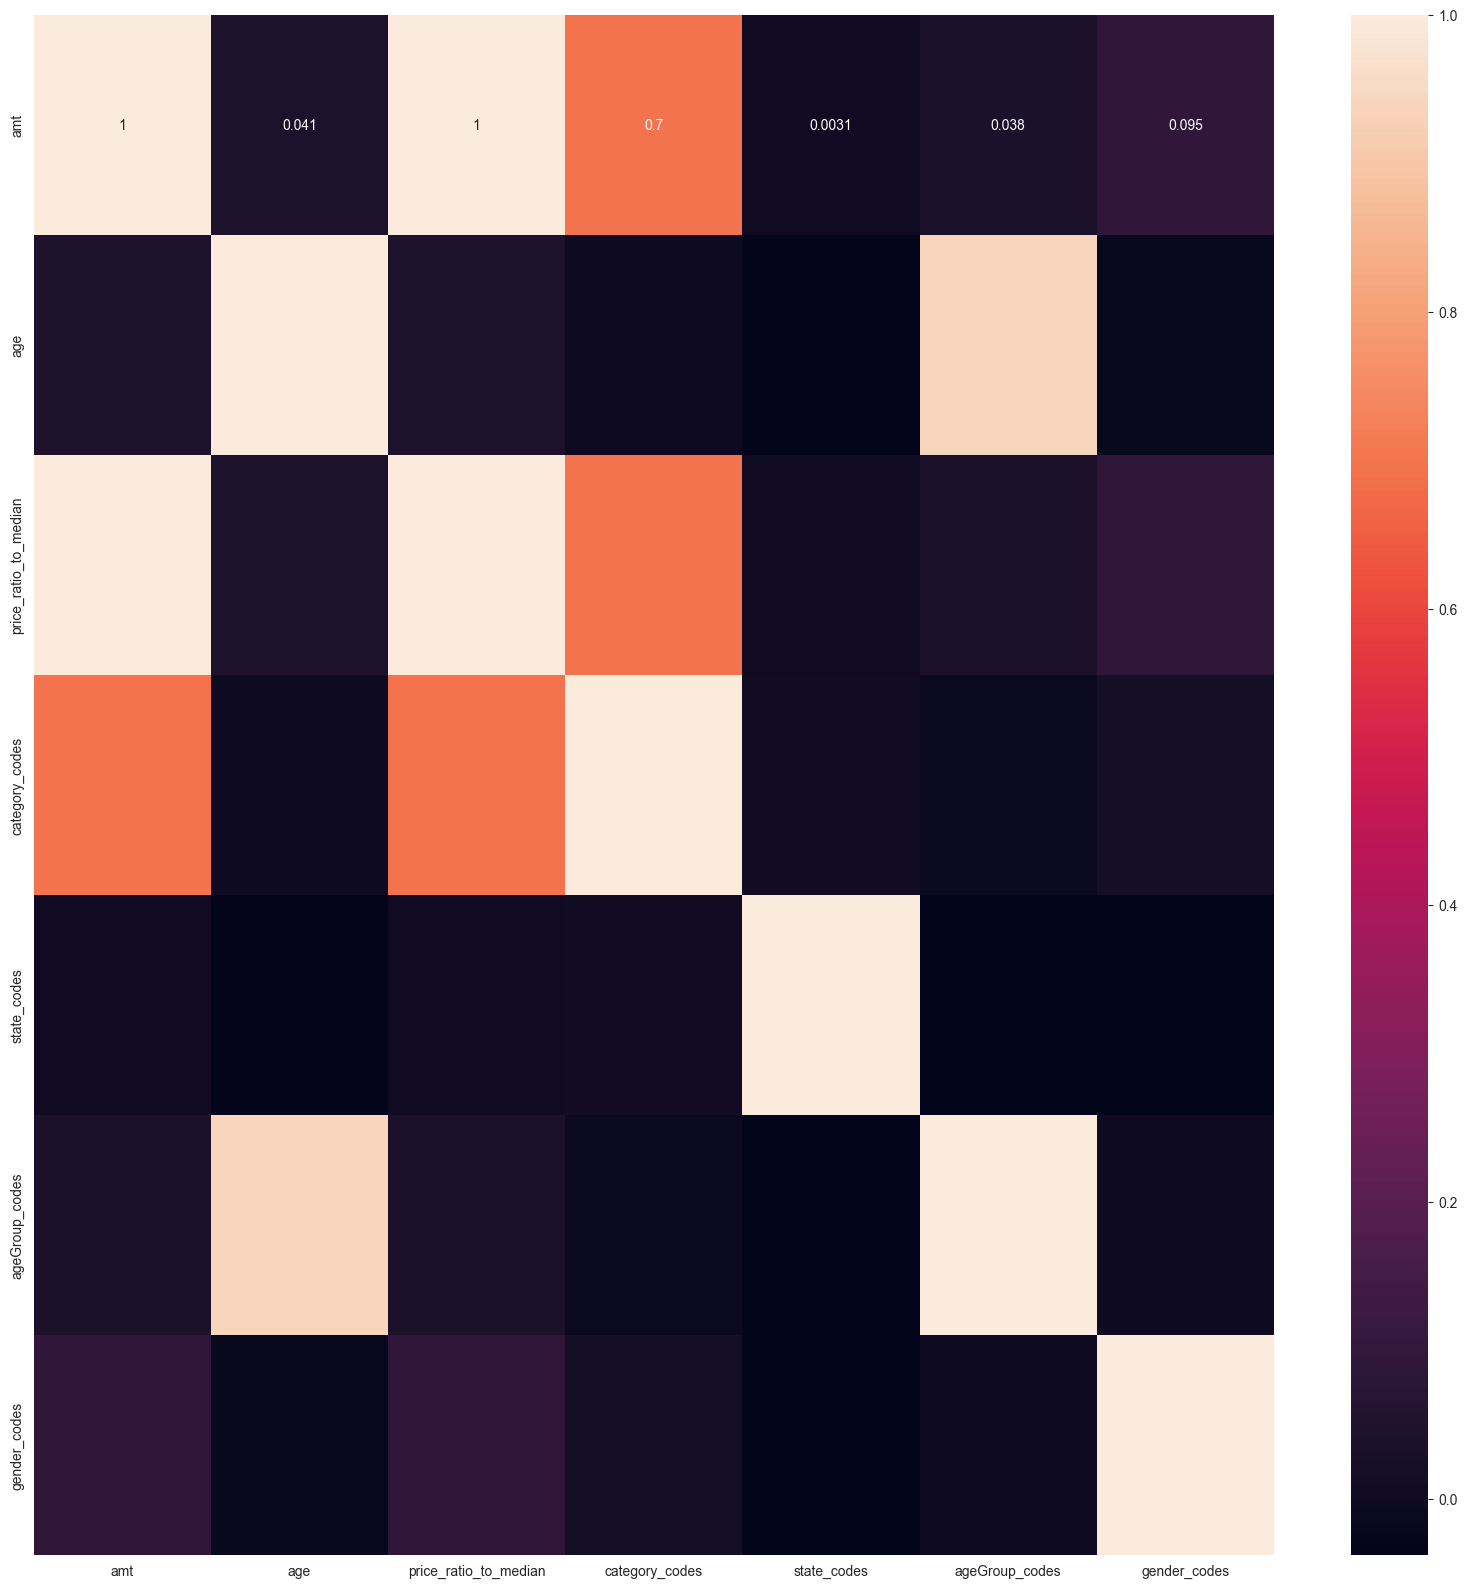

In [152]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(mod_fraud_df.corr(), annot = True)

In [154]:
mod_X_train, mod_X_test, mod_y_train, mod_y_test = train_test_split(mod_train_df, target, test_size=0.2, random_state=42)
print(X_train.size, X_test.size)

2236505040 559126260


## Retrain models

XGBClassifier Accuracy: 0.9972

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.82      0.66      0.73      1520

    accuracy                           1.00    259335
   macro avg       0.91      0.83      0.87    259335
weighted avg       1.00      1.00      1.00    259335

Model saved as XGBClassifier-featured.pkl
Time taken for execution: 1.05 seconds
--------------------------------------------------



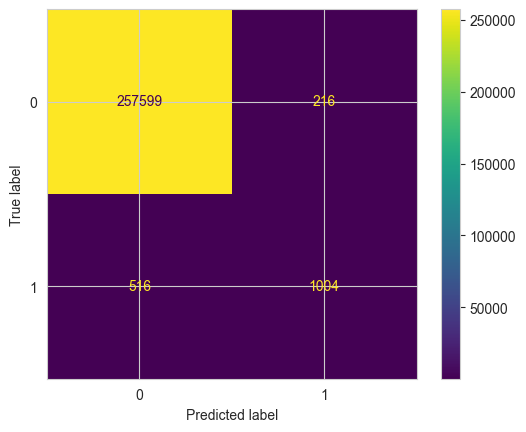

In [157]:
# With 11 features, it took 1.05 seconds to execute

improved_xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(improved_xgb_model, mod_X_train, mod_X_test, mod_y_train, mod_y_test, '-featured')

RandomForestClassifier Accuracy: 0.9974

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.83      0.68      0.75      1520

    accuracy                           1.00    259335
   macro avg       0.92      0.84      0.88    259335
weighted avg       1.00      1.00      1.00    259335

Model saved as RandomForestClassifier-featured.pkl
Time taken for execution: 53.70 seconds
--------------------------------------------------



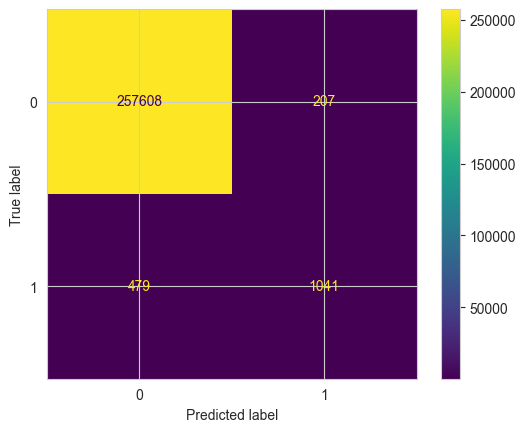

In [159]:
# With 11 features, it took 53.65 seconds to execute

improved_rfc_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(improved_rfc_model, mod_X_train, mod_X_test, mod_y_train, mod_y_test,  '-featured')

DecisionTreeClassifier Accuracy: 0.9959

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.64      0.67      0.66      1520

    accuracy                           1.00    259335
   macro avg       0.82      0.84      0.83    259335
weighted avg       1.00      1.00      1.00    259335

Model saved as DecisionTreeClassifier-featured.pkl
Time taken for execution: 2.50 seconds
--------------------------------------------------



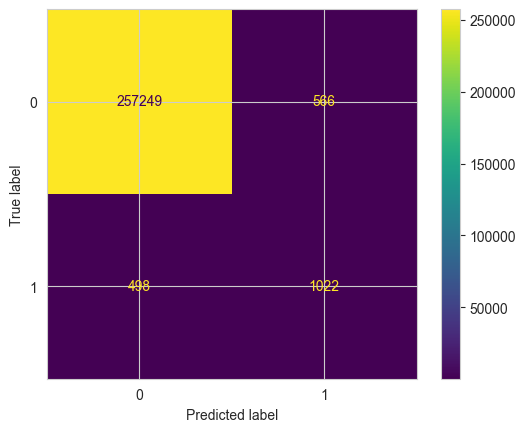

In [161]:
# With 11 features, it took 2.43 seconds to execute

improved_dtc_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(improved_dtc_model, mod_X_train, mod_X_test, mod_y_train, mod_y_test, '-featured')

GaussianNB Accuracy: 0.9861

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257815
           1       0.21      0.50      0.30      1520

    accuracy                           0.99    259335
   macro avg       0.60      0.74      0.64    259335
weighted avg       0.99      0.99      0.99    259335

Model saved as GaussianNB-featured.pkl
Time taken for execution: 0.27 seconds
--------------------------------------------------



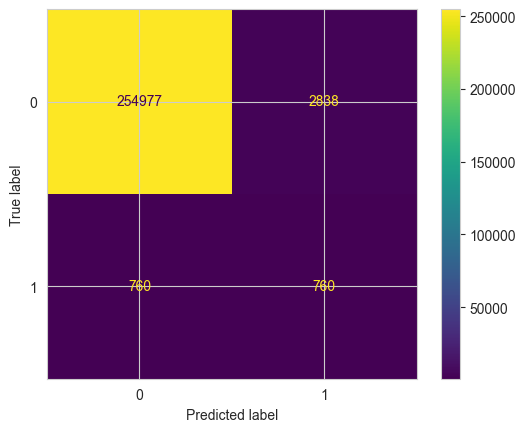

In [163]:
# With 11 features, it took 0.28 seconds to execute

improved_gnb_model = GaussianNB()
evaluate_and_save_model(improved_gnb_model, mod_X_train, mod_X_test, mod_y_train, mod_y_test, '-featured')

In [ ]:
# Takes a lot of time. SVC model is useful for anomaly detection.

# improved_svc_model = SVC(probability=True, class_weight='balanced')
# evaluate_and_save_model(improved_svc_model, mod_X_train, mod_X_test, mod_y_train, mod_y_test, '-featured')

In [ ]:
# Takes a lot of time. KNC model is useful for anomaly detection.

# improved_knc_model = KNeighborsClassifier()
# evaluate_and_save_model(improved_knc_model, mod_X_train, mod_X_test, mod_y_train, mod_y_test, '-featured')

#### BEST MODEL: RandomForestClassifier

Size of feature importances: 7, Size of feature names: 7


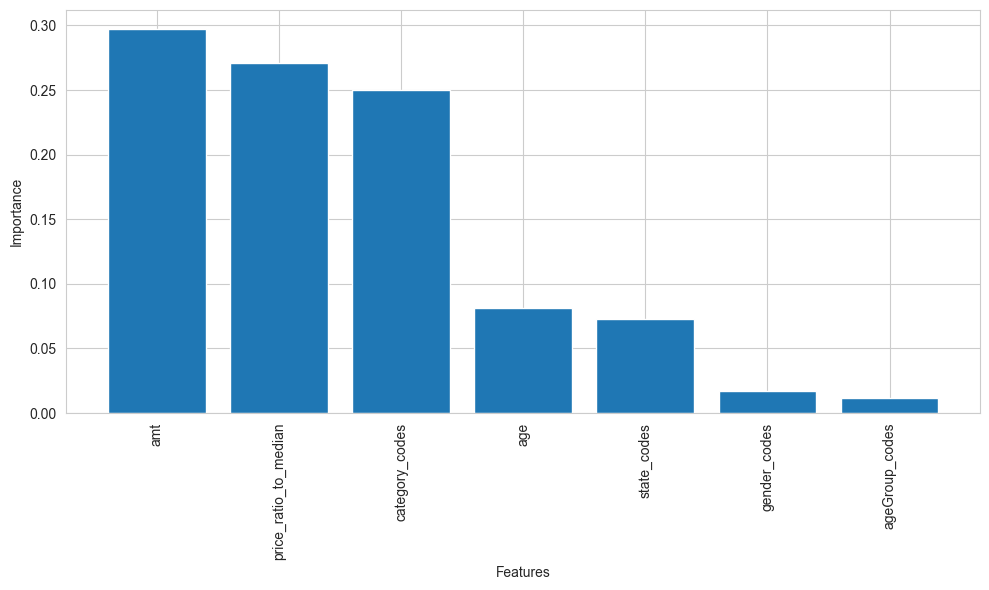

features  importance
0                    amt    0.297064
2  price_ratio_to_median    0.270963
3         category_codes    0.249900
1                    age    0.080951
4            state_codes    0.072448
6           gender_codes    0.016715
5         ageGroup_codes    0.011958

In [191]:
feature_importances = improved_rfc_model.feature_importances_
feature_names = mod_train_df.columns

print(f'Size of feature importances: {len(feature_importances)}, Size of feature names: {len(feature_names)}')

feature_importances_df = pd.DataFrame({
    'features': feature_names,
    'importance': feature_importances
})

# Sort the results
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['features'][:10], feature_importances_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

feature_importances_df

### B. Hyperparameter Tuning Using GridSearchCV

Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These parameters are defined by us. Machine learning algorithms never learn these parameters. These can be tuned in different step.

GridSearchCV is a technique for finding the optimal hyperparameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

The “best” parameters that GridSearchCV identifies are technically the best that could be produced, but only by the parameters that you included in your parameter grid.

In [165]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [187]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [4, 6, 10, 12],
#     'random_state': [13]
# }

# grid_rf = GridSearchCV(improved_rfc_model, param_grid=params, cv=kf, 
#                           scoring='recall').fit(X_train, y_train)

# print('Best parameters:', grid_rf.best_params_)
# print('Best score:', grid_rf.best_score_)

### C. Synthetic Minority Over-sampling Technique (SMOTE)

SMOTE (Synthetic Minority Oversampling Technique) is a technique used to address class imbalance by generating synthetic data for the minority class. It works by identifying similar instances within the minority class in the feature space and creating new samples along the lines connecting these instances. For example, in a dataset with fraudulent transactions (minority class), SMOTE generates new synthetic fraud cases to improve the model's ability to learn and recognize patterns associated with fraud.

By creating realistic synthetic samples, SMOTE enhances the representation of the minority class by focusing on the most informative features. This process continues until the minority class is more balanced with the majority class, leading to improved model performance and more reliable predictions across both classes.

In [194]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(mod_X_train, mod_y_train)

evaluate_and_save_model(improved_rfc_model, X_resampled, mod_X_test, y_resampled, mod_y_test, '-SMOTE')

ImportError: cannot import name 'parse_version' from 'sklearn.utils' (/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/__init__.py)

### D. Using Tomek Links

In [416]:
### Using GridSearchCV

### C. ENSEMBLING